<a href="https://colab.research.google.com/github/aenthea/AirbnbProj/blob/main/AirBnB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import display
from google.colab import files
uploaded = files.upload()
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
!pip install calmap
!pip install calplot
import calmap
import calplot
import io


df = pd.read_csv(io.BytesIO(uploaded["calendar.csv"]))

#Boston

#Calendar: https://drive.google.com/uc?id=1lfkvnv4pd6edvP021ZCw7E3m8xK0XuNy
#Listings: https://drive.google.com/uc?id=1yiH-zyfvq234XSW7U9FMM1DlfLBonJsM
#Reviews: https://drive.google.com/uc?id=10_noi0084bGJPMGfVQrB1U47EqlA7meE

Saving calendar.csv to calendar (1).csv


# Neuer Abschnitt

In [ ]:
# Aufgabe 1a) Load the calendar data set and get an overview of it
#pd.options.display.max_columns = None

dff = df.head(50)
display(dff)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,3781,2021-09-19,NaN,125.0,125.0,32,1125
1,3781,2021-09-20,NaN,125.0,125.0,32,1125
2,3781,2021-09-21,NaN,125.0,125.0,32,1125
3,3781,2021-09-22,NaN,125.0,125.0,32,1125
4,1374434,2021-09-19,NaN,65.0,65.0,28,270
5,1374434,2021-09-20,NaN,65.0,65.0,28,270
6,1374434,2021-09-21,NaN,65.0,65.0,28,270
7,1374434,2021-09-22,NaN,65.0,65.0,28,270
8,1374434,2021-09-23,NaN,65.0,65.0,28,270
9,1374434,2021-09-24,NaN,65.0,65.0,28,270


In [ ]:
# 1b) Transform data in columns price, available and date

for col in df.columns:

  if col == "price" or col == "adjusted_price":
    #Price: remove $ sign and transform object -> float 
    df[col] = df[col].str.replace("$","")
    df[col] = df[col].str.replace(",","")
    df[col] = pd.to_numeric(df[col])
  elif col == "available":
    #Available: replace t and f with True and False and transform object -> bool     
    d = {"t": True, "f": False}
    df["available"] = df["available"].map(d)
  elif col == "date":
    #Data: remove $ sign and transform object -> datetime
    df["date"] = pd.to_datetime(df["date"])
  
print(df.dtypes) 

AttributeError: ignored

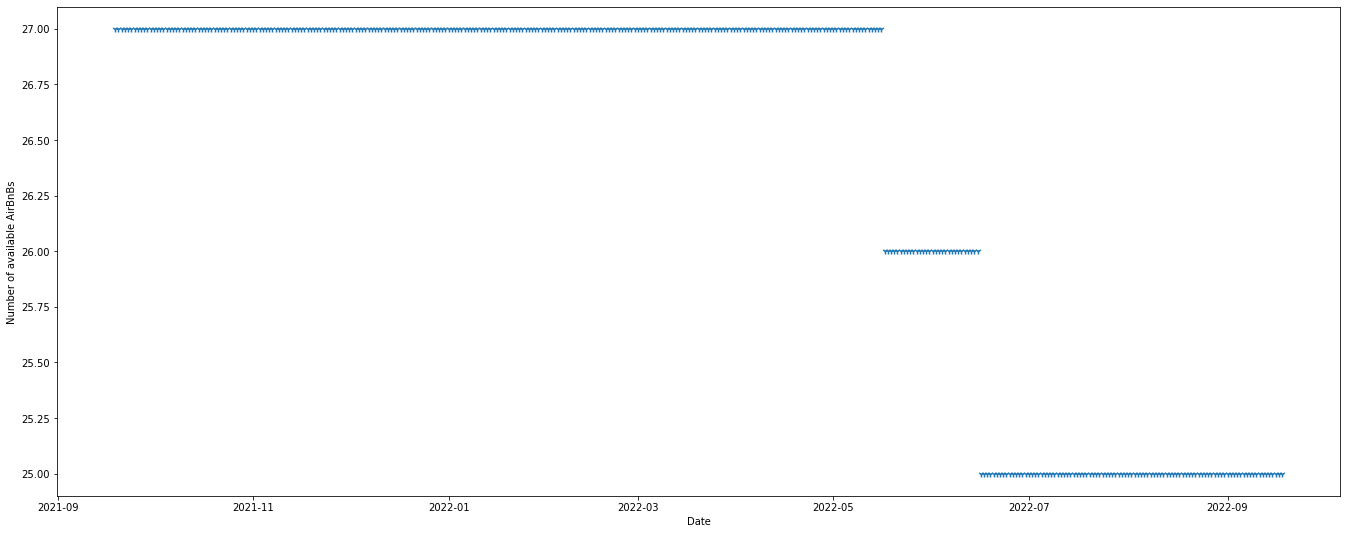

In [ ]:
#1c) Show the number of available Airbnb apartments in a simple line plot
from matplotlib.pyplot import figure

date_avail = {}

for eintrag in df["date"].head(10000):
  if eintrag in date_avail:
    date_avail[eintrag] += 1
  else:
    date_avail[eintrag] = 0

dates = date_avail.keys()
avails = date_avail.values()
plt.figure(figsize=(23, 9))
plt.xlabel("Date")
#plt.ylim([0, 3500])
plt.ylabel("Number of available AirBnBs")
plt.scatter(dates, avails, marker="1")

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


(<Figure size 1440x1080 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f989fd05c50>,
       dtype=object))

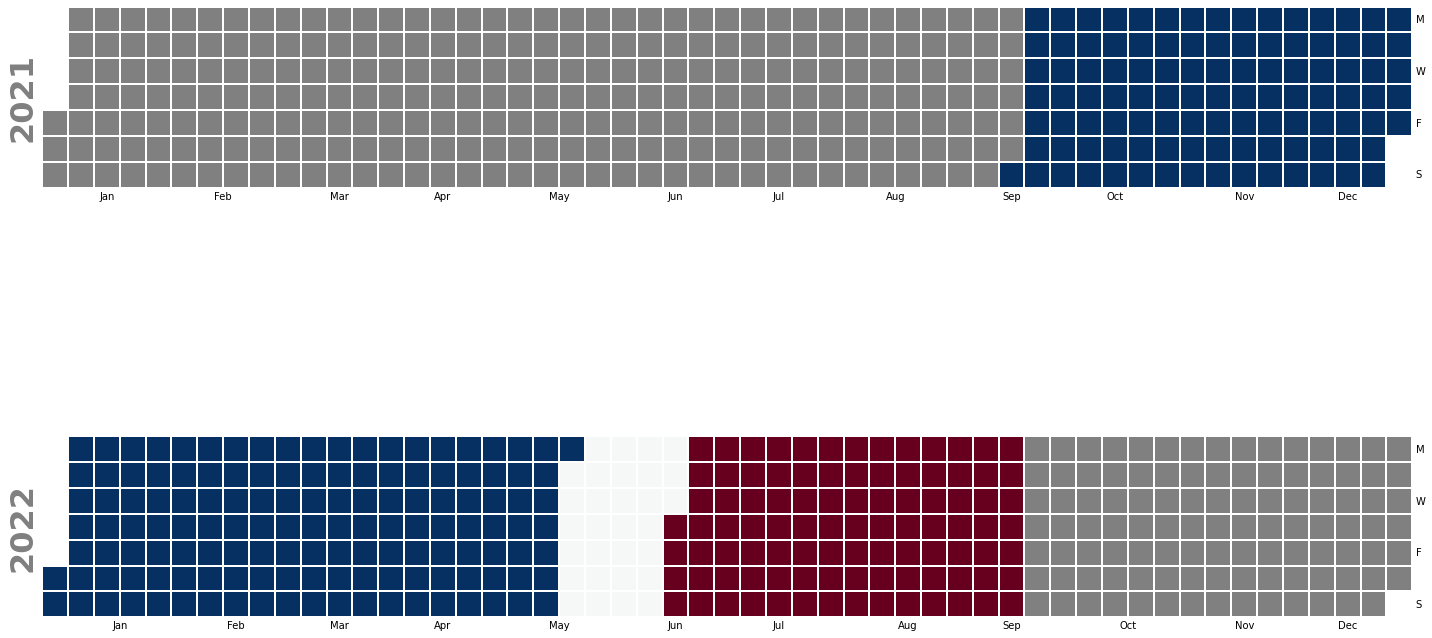

In [ ]:
# 1d) Create a calendar plot to visualize the availability of Airbnb listings

events = pd.Series(data=avails, index=dates)

calmap.calendarplot(events, monthticks=3, daylabels='MTWTFSS',
                    dayticks=[0, 2, 4, 6], cmap='RdBu',
                    fillcolor='grey', linewidth=1,
                    fig_kws=dict(figsize=(20, 15)))


In [ ]:
#2. Correlation between price and availability

#2a) Calculate the Correlation Coefficient between available and price
price = df["price"]
df["available"] = df["available"].astype(int)
available = df["available"]

df2 = pd.DataFrame(df,columns=['available','price'])

corrMatrix = df2.corr()
print (corrMatrix)
print(np.corrcoef(df["available"], df["price"]))

           available     price
available   1.000000  0.019519
price       0.019519  1.000000
[[ 1. nan]
 [nan nan]]


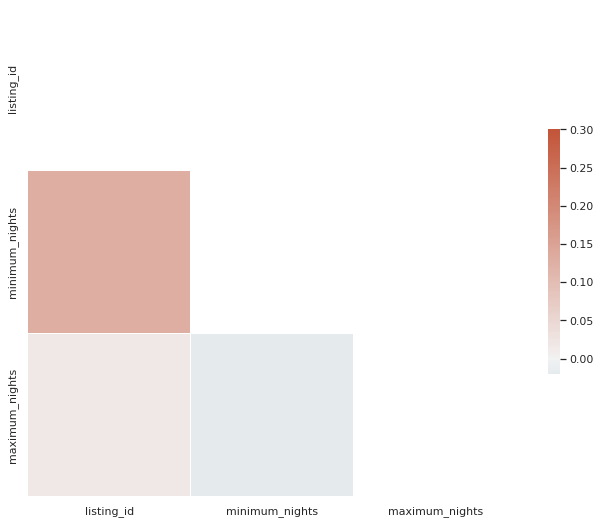

In [ ]:
#2b) Visualize Correlation

from string import ascii_letters

sn.set_theme(style="white")


# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

